<a href="https://colab.research.google.com/github/mshasibuan/Analisisbigdata/blob/main/ocr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/msyh.ttf
/content/msyh.ttf.zip
/content/X00016469670.jpg
/content/.config/active_config
/content/.config/default_configs.db
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/configurations/config_default
/content/.config/logs/2024.06.14/17.38.49.910604.log
/content/.config/logs/2024.06.14/17.38.38.781607.log
/content/.config/logs/2024.06.14/17.39.09.707862.log
/content/.config/logs/2024.06.14/17.39.10.317752.log
/content/.config/logs/2024.06.14/17.38.14.830445.log
/content/.config/logs/2024.06.14/17.38.58.635304.log
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv


In [21]:
!pip install https://github.com/myhub/tr/archive/1.5.1.zip

  Using cached https://github.com/myhub/tr/archive/1.5.1.zip
  Preparing metadata (setup.py) ... done


In [22]:
from tr import *
from PIL import Image, ImageDraw, ImageFont

In [29]:
img_pil = Image.open("/content/be.jpeg")
MAX_SIZE = 2000
if img_pil.height > MAX_SIZE or img_pil.width > MAX_SIZE:
    scale = max(img_pil.height / MAX_SIZE, img_pil.width / MAX_SIZE)

    new_width = int(img_pil.width / scale + 0.5)
    new_height = int(img_pil.height / scale + 0.5)
    img_pil = img_pil.resize((new_width, new_height), Image.BICUBIC)

print(img_pil.width, img_pil.height)
# img_pil

640 360


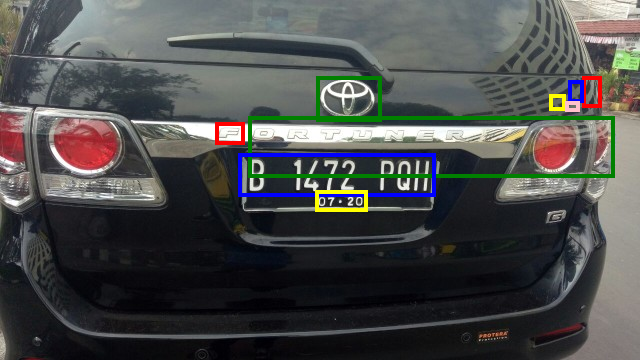

In [30]:
gray_pil = img_pil.convert("L")

rect_arr = detect(img_pil, FLAG_RECT)

img_draw = ImageDraw.Draw(img_pil)
colors = ['red', 'green', 'blue', "yellow", "pink"]

for i, rect in enumerate(rect_arr):
    x, y, w, h = rect
    img_draw.rectangle(
        (x, y, x + w, y + h),
        outline=colors[i % len(colors)],
        width=4)

img_pil

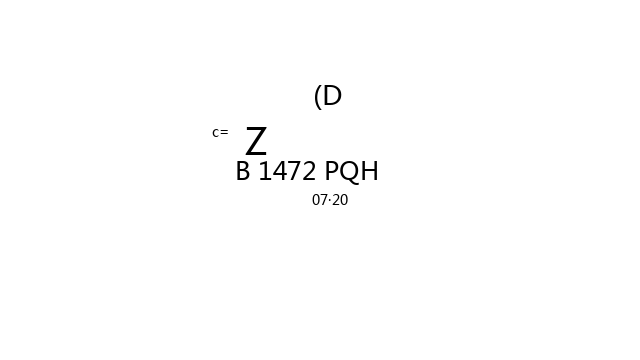

In [31]:
blank_pil = Image.new("L", img_pil.size, 255)
blank_draw = ImageDraw.Draw(blank_pil)

results = run(gray_pil)
for line in results:
    x, y, w, h = line[0]
    txt = line[1]
    font = ImageFont.truetype("/content/msyh.ttf", max(int(h * 0.6), 14))
    blank_draw.text(xy=(x, y), text=txt, font=font)

blank_pil